In [ ]:
pip install datasets

In [4]:
import pandas as pd
import numpy as np
from datasets import load_dataset

In [5]:
dataset = load_dataset("oscarfossey/NLP_Pole_emploi", data_files='Textual_description.csv')

Using custom data configuration oscarfossey--NLP_Pole_emploi-1643266db24a90f9


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/oscarfossey--NLP_Pole_emploi-1643266db24a90f9/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df_main =  pd.DataFrame(dataset['train'])

## Cleaning

In [7]:
df_main.head(3)

,textual description,code_rome,categorie,sub_categorie,sub_sub_categorie,name
0,"La CUMA des ARNAUDS, groupe d'agriculteurs à t...",A1101,A,11,1,Conduite d'engins agricoles et forestiers
1,"Rattaché(e) au chef de culture, vous aurez pou...",A1101,A,11,1,Conduite d'engins agricoles et forestiers
2,"Votre agence Partnaire Saint Avold, avec son é...",A1101,A,11,1,Conduite d'engins agricoles et forestiers


In [8]:
df_main.iloc[0]["textual description"]

"La CUMA des ARNAUDS, groupe d'agriculteurs à taille humaine avec un parcellaire rassemblé autour de Réaux sur Trèfle, cherche un(e) chauffeur(se) pour sa moissonneuse CASE axiale (barre de coupe 5m) sur la saison de moisson 2022. \nPostulez avant le 20 avril 2022.\nMissions :\t\n-\tConduite autonome de Moissonneuse batteuse\n-\tPréparation du matériel le matin : soufflage, dépoussiérage, graissage.\n\nDate :\tDébut entre le 15/6 et le 30/6 selon la maturité"

In [9]:
test = df_main.iloc[0]["textual description"]

def f(string):
    string = string.replace('\n', ' ').replace('\t', ' ').replace('  ', '')
    return string
            

In [10]:
f(test)

"La CUMA des ARNAUDS, groupe d'agriculteurs à taille humaine avec un parcellaire rassemblé autour de Réaux sur Trèfle, cherche un(e) chauffeur(se) pour sa moissonneuse CASE axiale (barre de coupe 5m) sur la saison de moisson 2022.Postulez avant le 20 avril 2022. Missions :- Conduite autonome de Moissonneuse batteuse - Préparation du matériel le matin : soufflage, dépoussiérage, graissage.Date : Début entre le 15/6 et le 30/6 selon la maturité"

In [11]:
(lambda x: x.replace('\n', ' ').replace('\t', ' ').replace('  ', ''))(test)

"La CUMA des ARNAUDS, groupe d'agriculteurs à taille humaine avec un parcellaire rassemblé autour de Réaux sur Trèfle, cherche un(e) chauffeur(se) pour sa moissonneuse CASE axiale (barre de coupe 5m) sur la saison de moisson 2022.Postulez avant le 20 avril 2022. Missions :- Conduite autonome de Moissonneuse batteuse - Préparation du matériel le matin : soufflage, dépoussiérage, graissage.Date : Début entre le 15/6 et le 30/6 selon la maturité"

In [12]:
df_main['textual description']  = df_main['textual description'].apply(lambda x: x.replace('\n', ' ').replace('\t', ' ').replace('  ', ''))

In [13]:
idx = np.random.randint(len(df_main))
print(df_main.iloc[idx]["name"])
df_main.iloc[idx]["textual description"]

Sécurité civile et secours


"&bull; Devenir pompier au sein de l'arm&eacute;e de l'Air et de l'Espace, c'est travailler pour prot&eacute;ger et d&eacute;fendre le personnel, les mat&eacute;riels et les sites de notre arm&eacute;e en France comme en op&eacute;rations ext&eacute;rieures&bull; Imaginez-vous &ecirc;tre chef d'agr&egrave;s au sein d'un ensemble de secours a&eacute;ronautique !Affect&eacute; en escadron de s&eacute;curit&eacute; d'incendie et de sauvetage vous &Ecirc;tes chef d'agr&egrave;s d&egrave;s votre sortie d'&eacute;coleTravaillez au rythme de l'activit&eacute; a&eacute;rienne avec des interventions &agrave; caract&egrave;res a&eacute;ronautiques et exercices quotidiensAssurez l'encadrement des activit&eacute;s militaires et professionnelles des militaires du rang pompier&Ecirc;tes pr&ecirc;t en cas d'alerte incendie sur la plateformeR&eacute;alisez des interventions de secours en milieu urbain et d'assistance &agrave; victimeSimulez des feux sur a&eacute;ronefs (A400M, Mirage 2000&hellip;)Assu

## Visualize

**Length of textual description overall and by categories**

Mean length :  1341.5061178224278


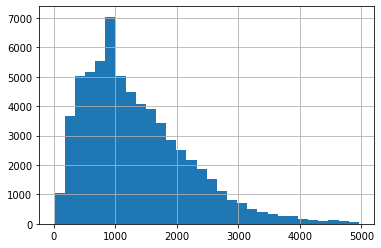

In [14]:
df_main['text_length'] = df_main["textual description"].apply(len)


print("Mean length : ", df_main['text_length'].mean())
df_main["text_length"].hist(bins = 30)

Mean length :  1341.5061178224278


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0ea86c6d0>,
      dtype=object)

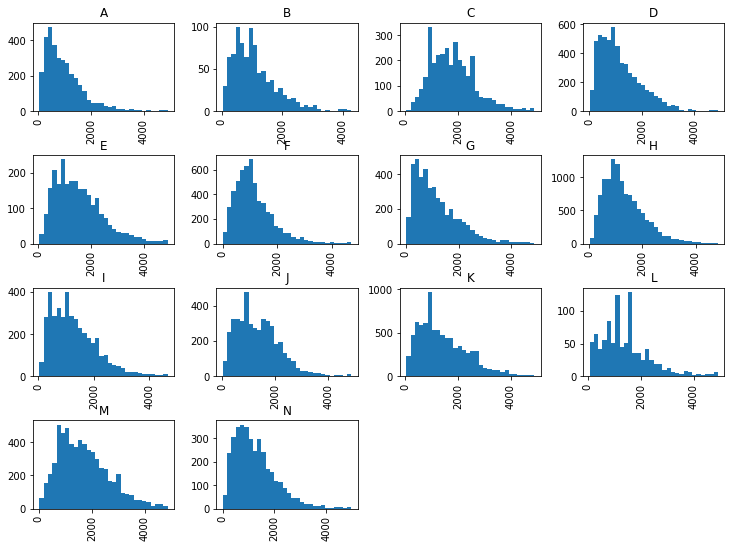

In [15]:
print("Mean length : ", df_main['text_length'].mean())
df_main["text_length"].hist(bins = 30, by = df_main["categorie"], figsize = (12,9))

**Repartion between the different categories**

categorie
A     3367
B      891
C     3143
D     5399
E     2526
F     5606
G     4308
H    11387
I     4062
J     4416
K     8412
L      967
M     6259
N     3659
Name: textual description, dtype: int64


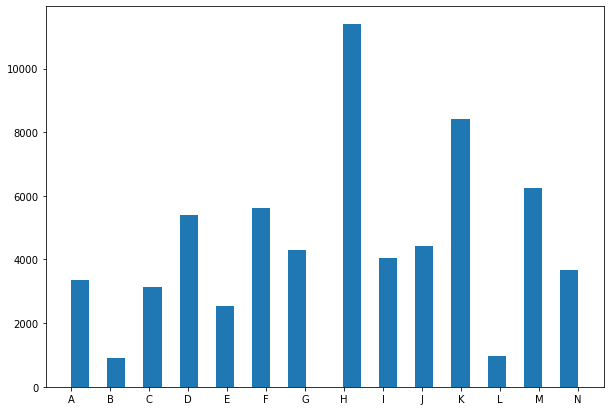

In [16]:
print(df_main.groupby("categorie").count()["textual description"])
df_main["categorie"].hist(bins = 28, grid = False, figsize = (10,7))


## Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
df_train, df_test= train_test_split(df_main, test_size=0.2, random_state=1, shuffle = True)

df_train, df_val= train_test_split(df_train, test_size=0.25, random_state=1, shuffle = True) #0.25*0.8 = 0.2

**Saving useful datasets in a local folder (optionnal because disponible at https://huggingface.co/datasets/oscarfossey/NLP_Pole_emploi)**

In [19]:
#df_train.to_csv('train_dataset.csv',index=False)
#df_val.to_csv('val_dataset.csv',index=False)
#df_test.to_csv('test_dataset.csv',index=False)